In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy 

In [2]:
x = np.arange(-5, 5, 0.1)

y1 = np.exp(-x**2)
y2 = np.exp(-x**2/(0.1**2))
y3 = np.exp(-x**2/4)

yper = np.exp(-np.sin(x*2)**2)

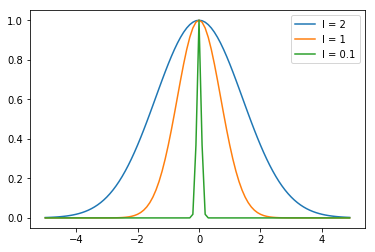

In [3]:
plt.plot(x, y3, label = 'l = 2')
plt.plot(x, y1, label = 'l = 1')
plt.plot(x, y2, label = 'l = 0.1')

plt.legend()
plt.show()

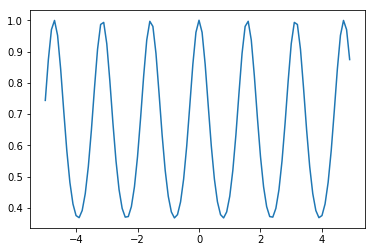

In [4]:
plt.plot(x, yper)
plt.show()

In [5]:
ker1 = GPy.kern.RBF(1) 
ker2 = GPy.kern.Linear(input_dim = 1)
ker3 = GPy.kern.PeriodicExponential(1, lengthscale=0.1, variance = 2, period = 3)

In [6]:
kprod = ker2 * ker3
ksum = ker2 + ker3
kprod

mul.,value,constraints,priors
linear.variances,1.0,+ve,
periodic_exponential.variance,2.0,+ve,
periodic_exponential.lengthscale,0.1,+ve,
periodic_exponential.period,3.0,+ve,


In [7]:
npts = 500
nsamples = 2
x = np.linspace(-4., 4., npts)
x = x[:, None]

K = ksum.K(x, x)

mu = np.zeros((npts)) 
Z = np.random.multivariate_normal(mu, K, nsamples)

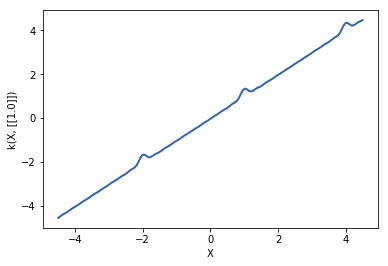

In [8]:
ksum.plot(ax=plt.gca())

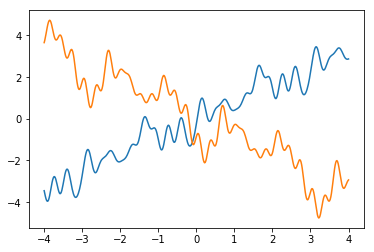

In [9]:
plt.figure() # open new plotting window
for i in range(nsamples):
    plt.plot(x[:], Z[i,:])

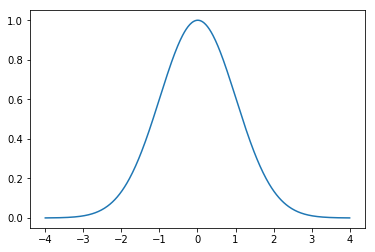

In [10]:
K1 = ker1.K(x, x)
y = K1[:, 250]
plt.plot(x, y)

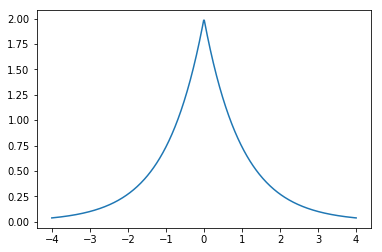

In [11]:
kexp = GPy.kern.Exponential(1)
K1 = kexp.K(x, x)
K2 = kexp.K(-x, x)

Ksym = K1 + K2
plt.plot(x, Ksym[250, :])

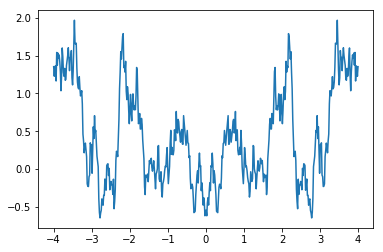

In [12]:
Zsym = np.random.multivariate_normal(mu, Ksym, nsamples)
plt.plot(x[:], Zsym[0,:])

In [13]:
ker2d = GPy.kern.RBF(2)
ker2d

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [14]:
npts = 50
x = np.linspace(-4., 4., npts)
X = []
for i in range(npts):
    for j in range(npts):
        X.append([x[i], x[j]])

In [15]:
X = np.reshape(X, (npts**2, 2))

Xs = np.zeros((npts**2, 2))
Xs[:, 1] = X[:, 0]
Xs[:, 0] = X[:, 1]

print(X.shape, Xs.shape)

(2500, 2) (2500, 2)


In [16]:
Kid = ker2d.K(X, X)
Ks = ker2d.K(Xs, X)

Ksym2d = Kid + Ks

In [17]:
mu = np.zeros((npts**2)) 
Zsym2D = np.random.multivariate_normal(mu, Ksym2d, 1)


In [18]:
X[:,0].shape
Z = Zsym2D.reshape(50*50)

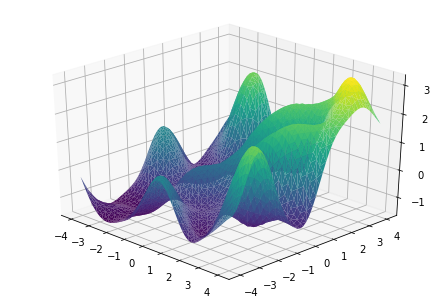

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X[:,0], X[:,1], Z, cmap=cm.viridis)
ax.view_init(30, -45)
plt.show()
